# LG2dAOHighl test notebook
Dieses Notebook dient als Test für die Klassen
 * LdftModel
 * Ldft2dAOHighl
 
Es kann aber auch als kleines Tutorial für diese Klassen betrachtet werden. Zu jeder aufgerufenen funktion kann übrigens die Hilfe aufgerufen werden. Z.B.: `help(LG2dAOHighl.create_init_profile)`

Lade zunächst benötigte Packages

In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy.optimize as op
import math
import os
from os import path
from ldft_classes_v2.lg_2d_highl import LG2dAOHighl

Mache die Plot's hübsch

In [2]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
rcParams.update({'figure.autolayout': True})

Entscheide welche der beiden Klassen getestet werden soll: LG2dMf oder LG2dAOHighl

In [3]:
Model=LG2dAOHighl

# Klassenbeschreibung

In [4]:
help(Model)

Help on class LG2dAOHighl in module ldft_classes_v2.lg_2d_highl:

class LG2dAOHighl(ldft_classes_v2.ldft_model.LdftModel)
 |  LG2dAOHighl(size, epsi, mu_fix_c=False, mu_c=None, dens_c=None, v_ext_c=None, bound_cond='periodic', r=None, r_hist=None, err_hist=None, it_hist=None)
 |  
 |  This class describes a single component lattice gas in 2d with
 |  sticky next neighbour attractions on a simple cubic lattice. The
 |  description is done within the framework of lattice density
 |  functional theory (ldft). The free energy functional was constructed
 |  by translating the model to the Asakura-Oosawa (AO) model and then
 |  setting up the functional of the resulting colloid-polymer
 |  dispersion by the Highlander version of dft. Therefor this class
 |  works with three species instead of one, namely the species of the
 |  extended AO-model (colloid, polymer clusters species accounting for
 |  attraction in x-direction and polymer for the attraction in
 |  y-direction). The free energy f

# Teste zunächst die \__init__-Methode :

In [4]:
size = (20, 40)
epsi = 2
dens = 0.3
model = Model(size, epsi=epsi, dens_c=dens, bound_cond="11_if")
print(model)

This is a Lattice gas described with lattice DFT. It was translated to the AO-model and the functional was constructed by the Highlander method It is an object of the Type 'LG2dAOHighl' and has the following properties:

Attr. strength 'epsi'                   : 2.0

It inherits from 'LdftModel', with the following properties:

This is a LdftModel with the following properties:

Systemsize                              : (20, 40)
mu_fix                                  : [False, True, True]
Chem. pot. 'mu'                         : [None, 1.854586542131141, 1.854586542131141]
Density                                 : [0.3, None, None]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'NoneType'>
History                                 : len=0
                                        : last entry=---
Error history                           : len=0
                                        : last value=---
Boundary Condition                      :

# Teste die Methoden zur erzeugung eines initialen Dichteprofiels

Mittlere Colloid-Dichte:                  0.3
Mittlere x-Polymer Cluster-Dichte:  0.20000000000000007
Mittlere y-Polymer Cluster-Dichte:  0.20000000000000004


/home/manuel/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


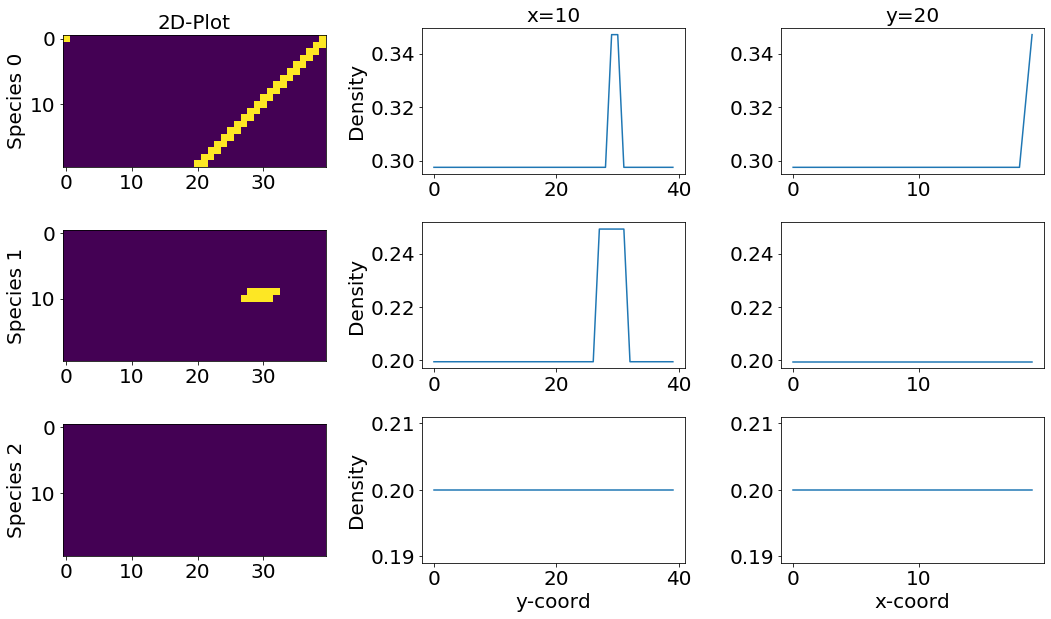

In [6]:
model.create_init_profile(dens=[0.3, 0.2, 0.2], shape=[(20,2), (2,5), (0,0)])
print('Mittlere Colloid-Dichte: {0:>20}'.format(np.mean(model.r[0])))
print('Mittlere x-Polymer Cluster-Dichte: {0:>20}'.format(np.mean(model.r[1])))
print('Mittlere y-Polymer Cluster-Dichte: {0:>20}'.format(np.mean(model.r[2])))
fig=model.print_2d_profile()
fig.show()

# Teste homogene Eigenschaften des Modells
## Vergleiche Ergebnisse von homogenen Methoden mit Ergebnissen von inhomogenen Methoden:
### 1) Unter fixierter Teilchendichte

Parameter unter denen der Test stattfinden soll:

In [7]:
epsi = 2
r_c = np.linspace(0, 0.99, 100)
r_pc = Model._cal_bulk_r_pc(r_c, epsi)

Berechne für verschiedene Teilchendichten <n>
* $\mu$ <br>
* $f$  <br>
(1) Mit den Methoden für homogene Systeme

In [10]:
mu1 = Model.cal_bulk_mu_lg(r_c, epsi)
f1 = Model.cal_bulk_f_lg(r_c, epsi)

/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/lg_2d_highl.py:541: RuntimeWarning: divide by zero encountered in log
  -3*cls._cal_dPhi_0(r_c)-4*np.log(z_pc+1))
/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/lg_2d_highl.py:562: RuntimeWarning: divide by zero encountered in log
  f_id = r_c*(np.log(r_c)-1) +2*r_pc*(np.log(r_pc)-1)
/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/lg_2d_highl.py:562: RuntimeWarning: invalid value encountered in multiply
  f_id = r_c*(np.log(r_c)-1) +2*r_pc*(np.log(r_pc)-1)


(2) Über die inhomogenen Funktionalgleichungen mittels Picard-Itteration

In [14]:
r_c2 = np.linspace(0.01, 0.99, 20)
mu2 = []
f2 = []
for r in r_c2:
    hom = Model((5,5), epsi, dens_c=r)
    print(hom._dens)
    hom.create_init_profile([r, 0.1, 0.1], [(0,0), (0,0), (0,0)])
    hom.make_picard_iteration(0.02, 1000, 1000)
    mu2.append(hom.mu_c)
    f2.append(hom.cal_F_lg()/25)

[0.01, None, None]
checkpoint at:       1000, Error: 7.52316384526264e-35
[0.06157894736842105, None, None]
checkpoint at:       1000, Error: 1.2037062152420224e-33
[0.1131578947368421, None, None]
checkpoint at:       1000, Error: 4.8148248609680896e-33
[0.16473684210526315, None, None]
checkpoint at:       1000, Error: 1.9259299443872359e-32
[0.2163157894736842, None, None]
checkpoint at:       1000, Error:                  0.0
[0.26789473684210524, None, None]
checkpoint at:       1000, Error:                  0.0
[0.3194736842105263, None, None]
checkpoint at:       1000, Error: 1.925929944387236e-30
[0.37105263157894736, None, None]
checkpoint at:       1000, Error: 7.703719777548943e-32
[0.4226315789473684, None, None]
checkpoint at:       1000, Error:                  0.0
[0.47421052631578947, None, None]
checkpoint at:       1000, Error: 2.7733391199176196e-30
[0.5257894736842105, None, None]
checkpoint at:       1000, Error: 3.0814879110195774e-31
[0.5773684210526315, None, No

(3) Vergleiche die Ergebnisse der beiden Methoden

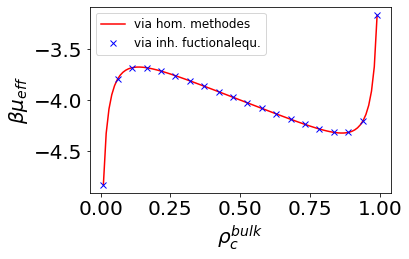

In [15]:
plt.plot(r_c, mu1, 'r', label=r'via hom. methodes')
plt.plot(r_c2, mu2, 'bx', label=r'via inh. fuctionalequ.')
plt.xlabel(r'$\rho_c^{bulk}$')
plt.ylabel(r'$\beta\mu_{eff}$')
plt.legend()

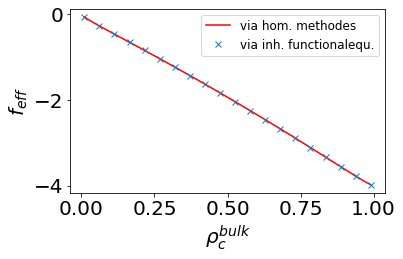

In [16]:
plt.plot(r_c, f1, 'r',label='via hom. methodes')
plt.plot(r_c2, f2, 'x', label='via inh. functionalequ.')
plt.xlabel(r'$\rho_c^{bulk}$')
plt.ylabel(r'$f_{eff}$')
plt.legend()

### 2) Unter fixiertem chemischen Potential:

Parameter unter denen der Test stattfinden soll:

In [17]:
# Ising- Modell Parameter
beta=0.5
J=1
gamma=4 #Anzahl nächster Nachbarn
h=0.25

# Umrechnen in Parameter des Gittergases
mu = -2*beta*(J*gamma-h)
epsi = 4*J #Das ist die Wechselwirkungsstärke in Einheiten Energie
epsi = beta*epsi #Bei uns werden allerdings alle Größen mit Einheit Energie mit beta multipliziert
mu_pc=Model.translate_epsi_to_mu_pc(epsi)

(1) Berechne die Koexistenzdichten unter verwendung der homogenen Methoden

In [24]:
coex_r_c = Model.cal_bulk_coex_dens(mu, epsi)
coex_r_pc = tuple(Model._cal_bulk_r_pc(np.array(coex_r_c), epsi))
print('rho_r_c='+str(coex_r_c))
print('rho_r_pc='+str(coex_r_pc))

rho_r_c=(0.07205649446881608, 0.977407184835931)
rho_r_pc=(0.7586573088436317, 0.00256844998713833)
<class 'tuple'>


(2) Berechne die Koexistenzdichten unter Verwendung der inhomogenen Funktionalgleichungen mittels Picard-Iteration

In [25]:
hom = Model((5,5), epsi=epsi, mu_c=mu, mu_fix_c=True)
#Berechne koexisterende Flüssigdichte:
hom.create_init_profile([0.6, 0.1, 0.1], [(0,0), (0,0), (0,0)])
hom.make_picard_iteration(0.02, 10000, 1000)
r_l = hom.dens
print('rho_liqu='+str(r_l))

checkpoint at:       1000, Error: 4.636422812543256e-09
checkpoint at:       2000, Error: 1.0738687555266713e-17
checkpoint at:       3000, Error: 2.7364845245018255e-26
checkpoint at:       4000, Error: 3.3557403351003198e-28
checkpoint at:       5000, Error: 3.3557403351003198e-28
checkpoint at:       6000, Error: 3.3557403351003198e-28
checkpoint at:       7000, Error: 3.3557403351003198e-28
checkpoint at:       8000, Error: 3.3557403351003198e-28
checkpoint at:       9000, Error: 3.3557403351003198e-28
checkpoint at:      10000, Error: 3.3557403351003198e-28
rho_liqu=[0.977407184836229, 0.0025684499870781193, 0.0025684499870781193]


In [26]:
#Berechne koexistierende Gasphase:
hom.create_init_profile([0.1, 0.7, 0.7], [(0,0), (0,0),(0,0)])
hom.make_picard_iteration(0.02, 10000, 1000)
r_g = hom.dens
print('rho_gas='+str(r_g))

checkpoint at:       1000, Error: 1.3814867909629432e-06
checkpoint at:       2000, Error: 1.376854712686686e-09
checkpoint at:       3000, Error: 1.3198662906966183e-12
checkpoint at:       4000, Error: 1.263702959575525e-15
checkpoint at:       5000, Error: 1.2098835741037133e-18
checkpoint at:       6000, Error: 1.1583574073078313e-21
checkpoint at:       7000, Error: 1.108907012998625e-24
checkpoint at:       8000, Error: 1.0863448592559252e-27
checkpoint at:       9000, Error: 8.093720591287359e-30
checkpoint at:      10000, Error: 8.093720591287359e-30
rho_gas=[0.07205649446966374, 0.7586573088425205, 0.7586573088425205]


# Teste nun die inhomogenen Eigenschaften der Funktionalgleichungen
## Mache eine Picard-Iteration unterhalb des kritischen Punktes

Wähle Systemparameter unterhalb des kritischen Punktes (Vgl. Phasendiagramm aus Notebook GG-2Dhom.jpynb)

/home/manuel/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


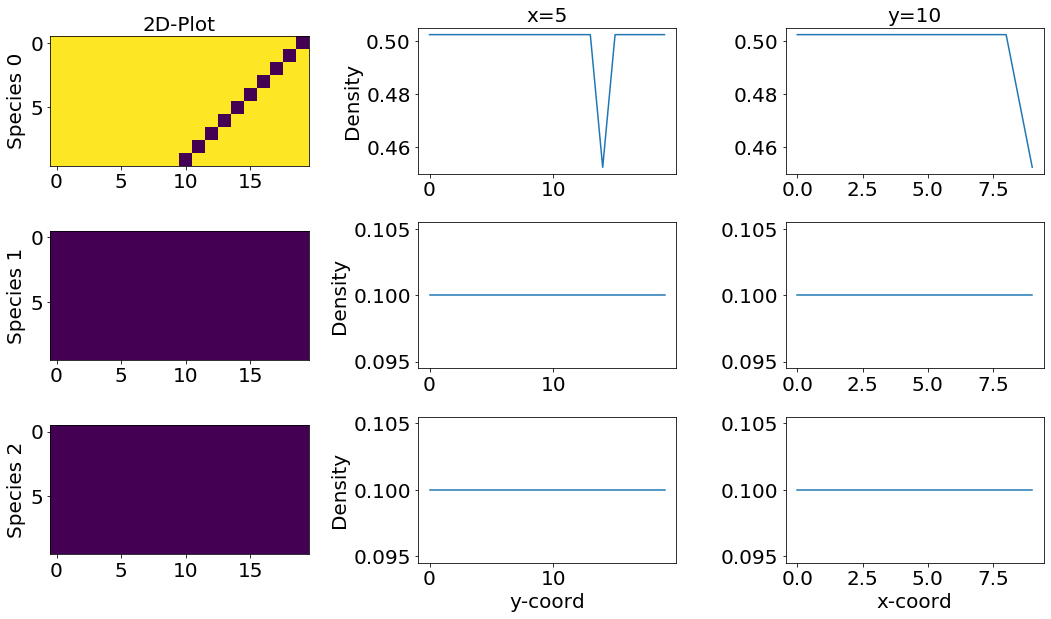

In [27]:
epsi=1.6
dens = 0.5
size = (10,20)
model = Model(size, epsi=epsi, dens_c=dens, bound_cond='11_if')
model.create_init_profile([dens, 0.1, 0.1], [(10,1), (0,0), (0,0)])
fig=model.print_2d_profile()
fig.show()

In [28]:
model.make_picard_iteration(0.02, 30000, 'dec2')

checkpoint at:         20, Error: 0.011855213304113543
checkpoint at:         40, Error: 0.0007546052017758719
checkpoint at:         60, Error: 0.0002529983741026526
checkpoint at:         80, Error: 0.0001306379889403168
checkpoint at:        100, Error:  7.7042426685195e-05
checkpoint at:        300, Error: 4.927061698586198e-06
checkpoint at:        500, Error: 1.2371887906270233e-06
checkpoint at:        700, Error: 4.3580373455326177e-07
checkpoint at:        900, Error: 2.0927751387576908e-07
checkpoint at:       1100, Error: 1.466240578565314e-07
checkpoint at:       3100, Error: 2.352808571019118e-07
checkpoint at:       5100, Error: 4.770681787350997e-07
checkpoint at:       7100, Error: 9.65031201913362e-07
checkpoint at:       9100, Error: 1.9427213987435547e-06
checkpoint at:      11100, Error: 3.873095566504251e-06


This is a Lattice gas described with lattice DFT. It was translated to the AO-model and the functional was constructed by the Highlander method It is an object of the Type 'LG2dAOHighl' and has the following properties:

Attr. strength 'epsi'                   : 1.6

It inherits from 'LdftModel', with the following properties:

This is a LdftModel with the following properties:

Systemsize                              : (10, 20)
mu_fix                                  : [False, True, True]
Chem. pot. 'mu'                         : [-3.1999793206343394, 1.3744829867588022, 1.3744829867588022]
Density                                 : [0.5, 0.28104010595656453, 0.28104010595656453]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=17
                                        : last entry=30000
Error history                           : len=30000
                                        : last v

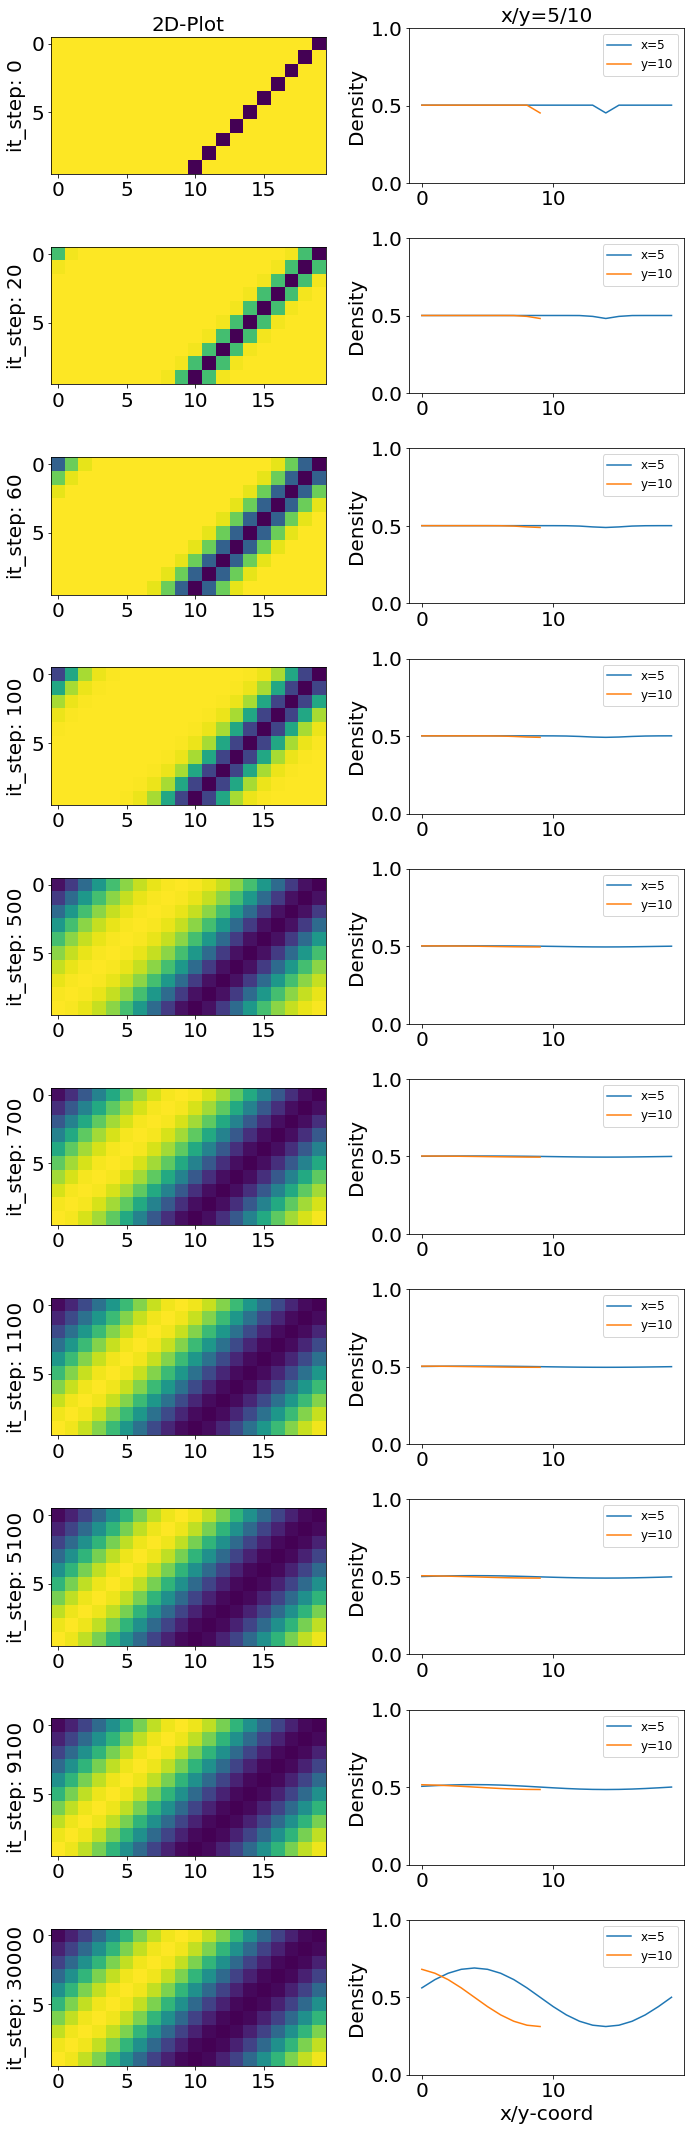

In [31]:
print(model)
fig =model.print_2d_hist2()

In [32]:
model.make_picard_iteration(0.02, 10000, 'dec1')

checkpoint at:      40000, Error: 2.0441926255409755e-09


This is a Lattice gas described with lattice DFT. It was translated to the AO-model and the functional was constructed by the Highlander method It is an object of the Type 'LG2dAOHighl' and has the following properties:

Attr. strength 'epsi'                   : 1.6

It inherits from 'LdftModel', with the following properties:

This is a LdftModel with the following properties:

Systemsize                              : (10, 20)
mu_fix                                  : [False, True, True]
Chem. pot. 'mu'                         : [-3.199999322223237, 1.3744829867588022, 1.3744829867588022]
Density                                 : [0.5, 0.28155273141113146, 0.28155273141113146]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=18
                                        : last entry=40000
Error history                           : len=40000
                                        : last va

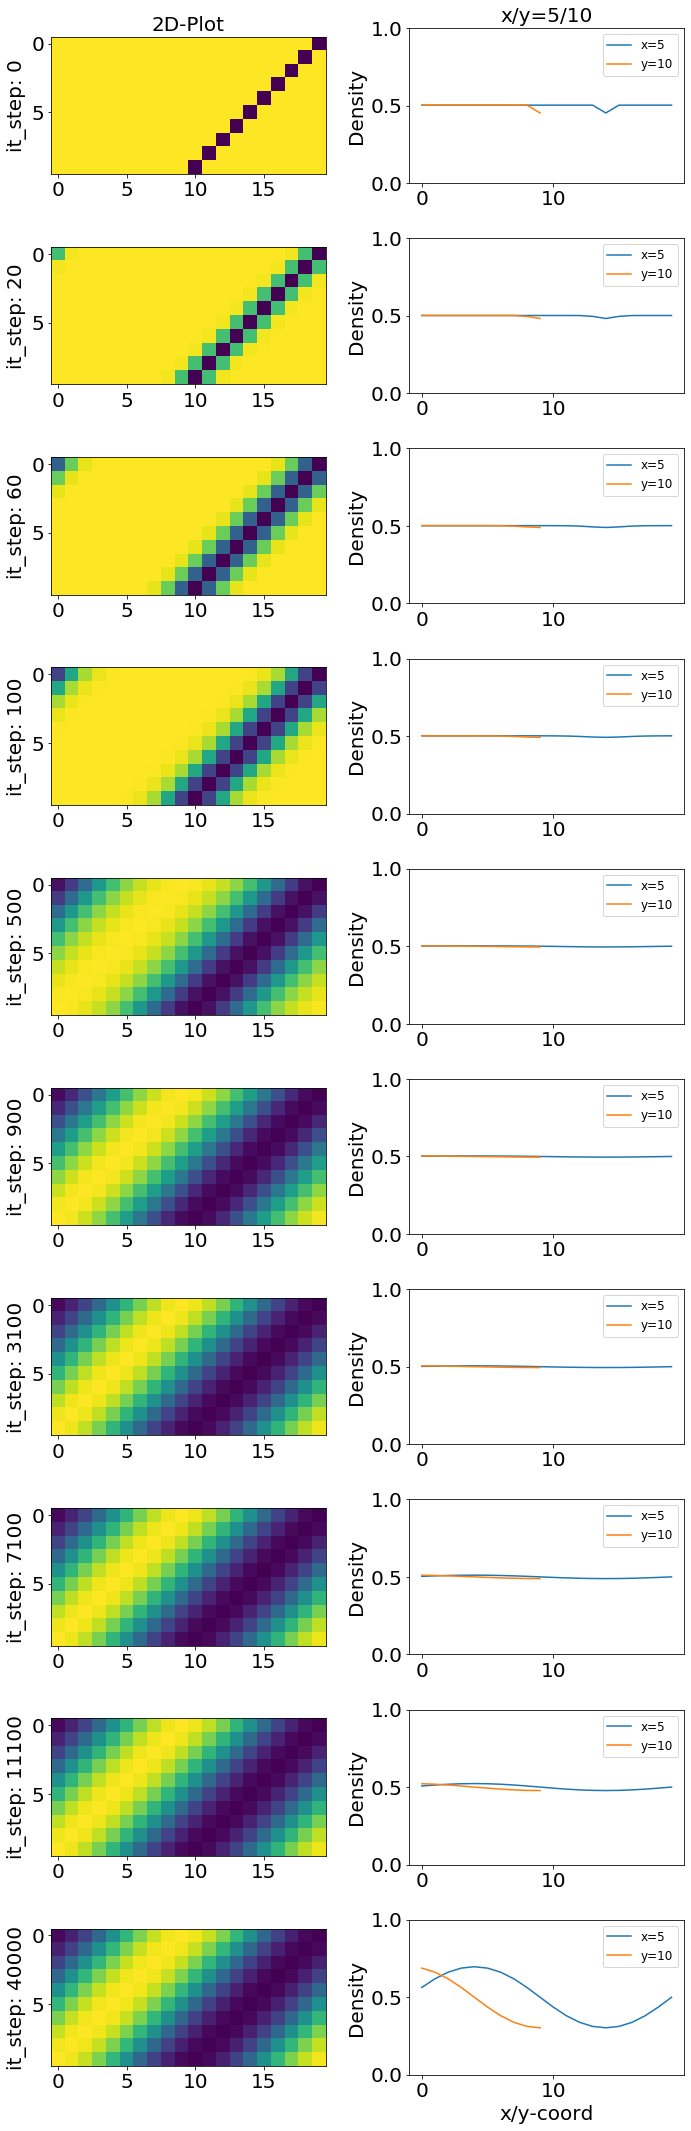

In [33]:
print(model)
fig=model.print_2d_hist2()

## Lade ein vorhandenes Dichteprofiel und vergleiche Oberflächeneigenschaften

Lade von 'GG-2D-inhom.jpynb'-erstelltes Dichteprofiel

In [5]:
directory = "/home/manuel/Documents/Masterarbeit/created_data_(v2)/2d-highlander/size=64/epsi=2,0"
file = 'dens=0,48(old).pkl'
print(path.exists(directory))
model = Model.load_syst(directory, file)

True


This is a Lattice gas described with lattice DFT. It was translated to the AO-model and the functional was constructed by the Highlander method It is an object of the Type 'LG2dAOHighl' and has the following properties:

Attr. strength 'epsi'                   : 2.0

It inherits from 'LdftModel', with the following properties:

This is a LdftModel with the following properties:

Systemsize                              : (64, 64)
mu_fix                                  : [False, True, True]
Chem. pot. 'mu'                         : [-4.000001088858416, 1.854586542131141, 1.854586542131141]
Density                                 : [0.4799999999984349, None, None]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=1
                                        : last entry=0
Error history                           : len=1
                                        : last value=[9.999527795337293e-13

<bound method Figure.show of <Figure size 720x648 with 6 Axes>>

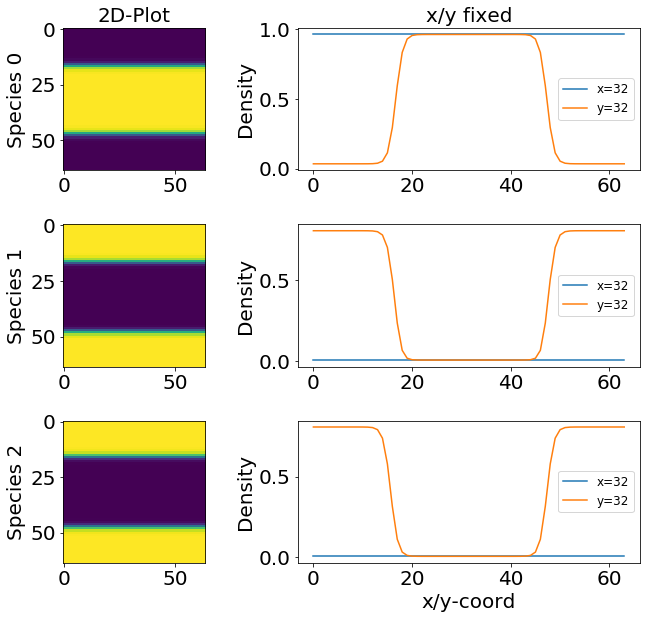

In [6]:
print(model)
fig=model.print_2d_profile2()
fig.show

/home/manuel/miniconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


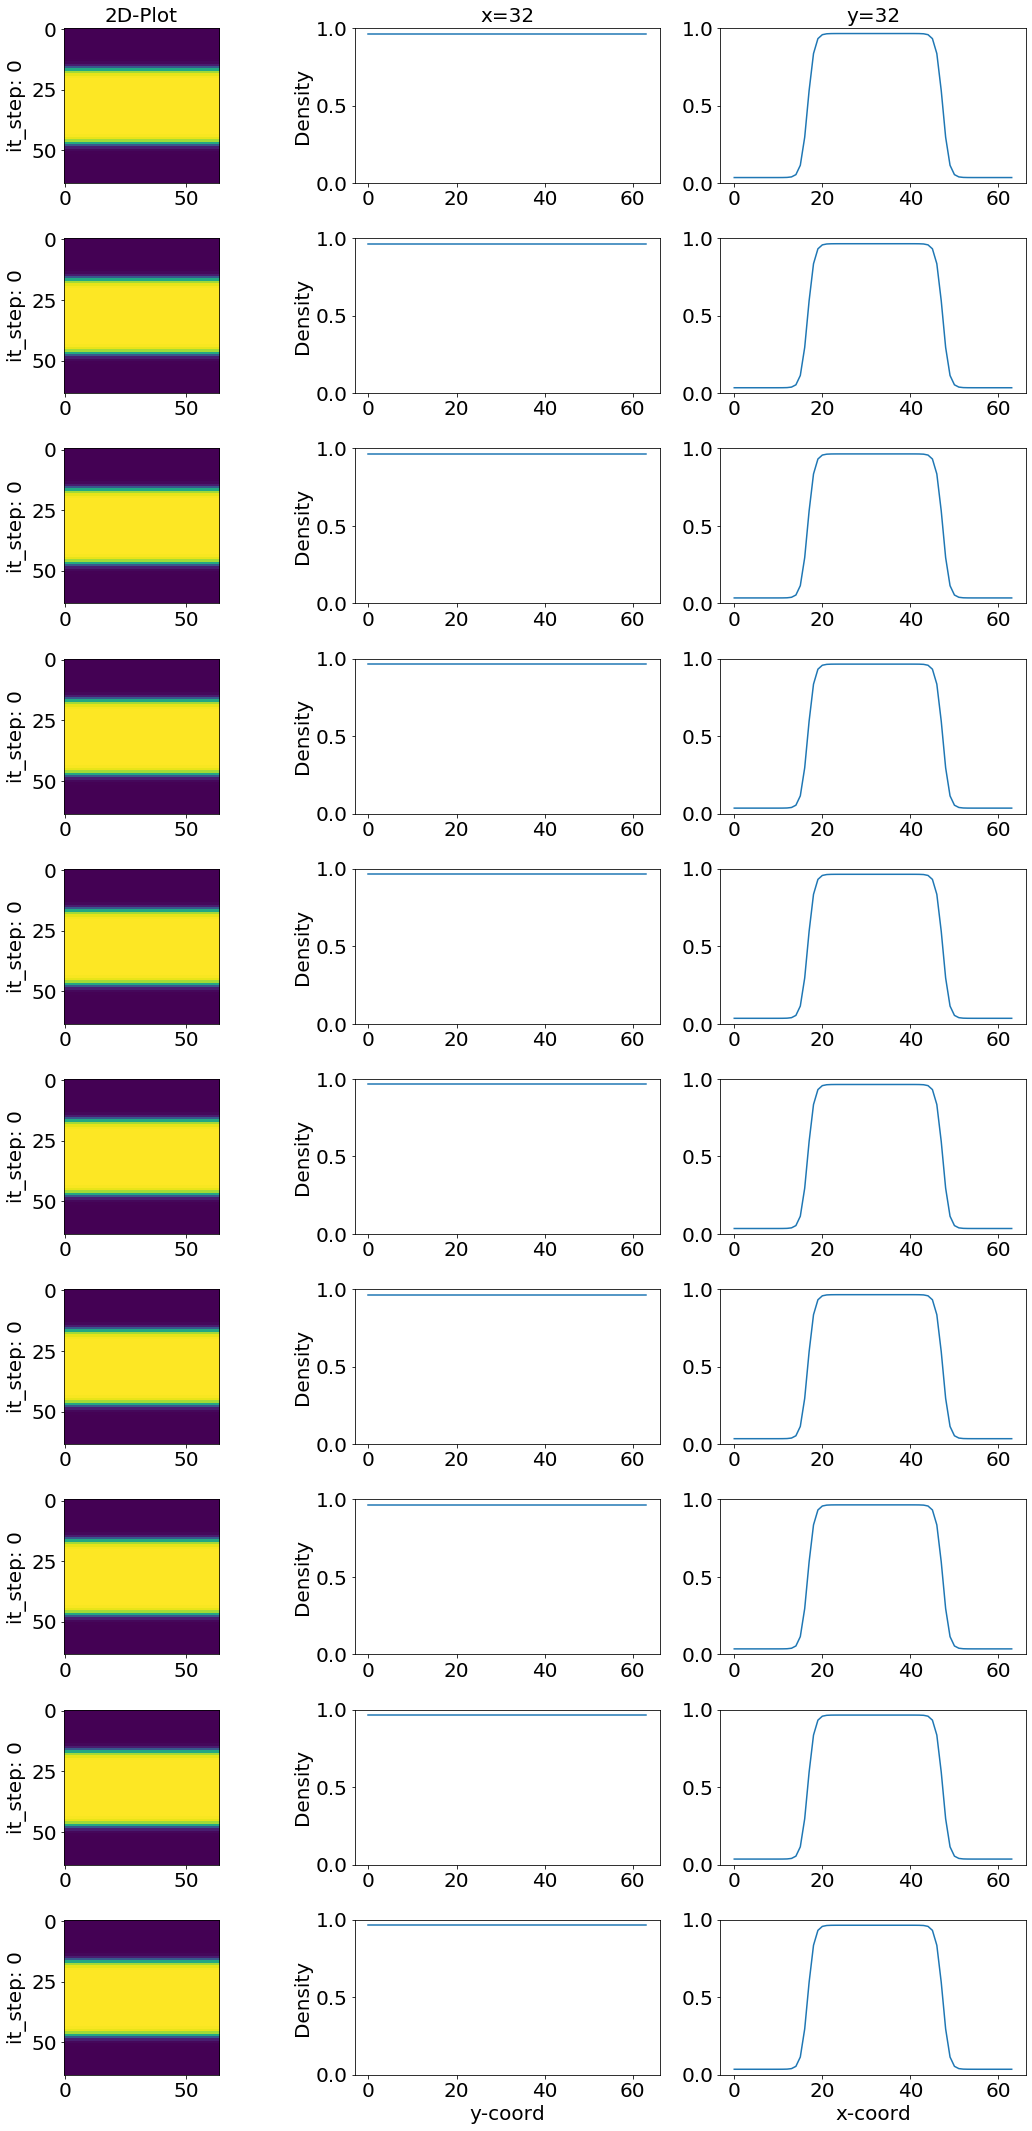

In [7]:
fig=model.print_2d_hist()
fig.show()

In [7]:
prop={}
prop['F'] = model.cal_F()
prop['p_l'] = model.cal_p_liq()
prop['p_v'] = model.cal_p_vap()
prop['gamma_R'] = model.cal_gamma_R(4)
prop['gamma_s'] = model.cal_gamma_s()
prop['gamma_em'] = model.cal_gamma_em()
prop['gamma_inf'] = model.cal_gamma_inf(64)
prop['R_em'] = model.cal_R_em()
prop['ads. at S.O.T.'] = model.cal_adsorptionAtSurfOfTens()
prop['del_Om'] = model.cal_del_Om()
for key, value in prop.items():
    print(key+"="+str(value)+"\n")

F=-1626.4813126913548

p_l=0.024801785492717165

p_v=0.02480279658798315

gamma_R=2.3387626199662264

gamma_s=nan

gamma_em=0.37454425913188655

gamma_inf=0.45921536364220206

R_em=24.976335829906624

ads. at S.O.T.=(nan, nan)

del_Om=58.77956654620186



/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/ldft_model.py:1266: RuntimeWarning: invalid value encountered in sqrt
  gamma_s=np.sqrt(del_Om*del_p/np.pi)
/home/manuel/Insync/manuel.maeritz@gmail.com/Google Drive/Documents/Uni/Masterarbeit/code/classes_v2/ldft_classes_v2/ldft_model.py:1198: RuntimeWarning: invalid value encountered in double_scalars
  R = (del_Om/del_p/np.pi)**(1/2)


## Führe Pic.-Iteration durch und vergleiche Dichteprofiel mit dem aus Notebook 'lg_2d_mf.jpynb'

Lade von 'lg_2d_mf.jpynb'-erstelltes Dichteprofiel

In [8]:
directory = "/home/manuel/Documents/Masterarbeit/created_data_(v2)/2d-highlander/size=64/epsi=2,0"
file = 'dens=0,33.pkl'
print(path.exists(directory))
model = Model.load_syst(directory, file)
print(model)
print(model.it_hist)
print(model.err_hist[7100])

True
This is a Lattice gas described with lattice DFT. It was translated to the AO-model and the functional was constructed by the Highlander method It is an object of the Type 'LG2dAOHighl' and has the following properties:

Attr. strength 'epsi'                   : 2.0

It inherits from 'LdftModel', with the following properties:

This is a LdftModel with the following properties:

Systemsize                              : (64, 64)
mu_fix                                  : [False, True, True]
Chem. pot. 'mu'                         : [-3.9753601292437266, 1.854586542131141, 1.854586542131141]
Density                                 : [0.33, None, None]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=18
                                        : last entry=44643
Error history                           : len=44643
                                        : last value=[9.998607416807158e-1

Übernehme initiales Dichteprofiel für die Pic-It

This is a Lattice gas described with lattice DFT. It was translated to the AO-model and the functional was constructed by the Highlander method It is an object of the Type 'LG2dAOHighl' and has the following properties:

Attr. strength 'epsi'                   : 2.0

It inherits from 'LdftModel', with the following properties:

This is a LdftModel with the following properties:

Systemsize                              : (64, 64)
mu_fix                                  : [False, True, True]
Chem. pot. 'mu'                         : [None, 1.854586542131141, 1.854586542131141]
Density                                 : [0.33, None, None]
External potential 'V_ext'              : off
Curent dens prof                        : <class 'list'>
History                                 : len=1
                                        : last entry=0
Error history                           : len=0
                                        : last value=---
Boundary Condition                      : peri

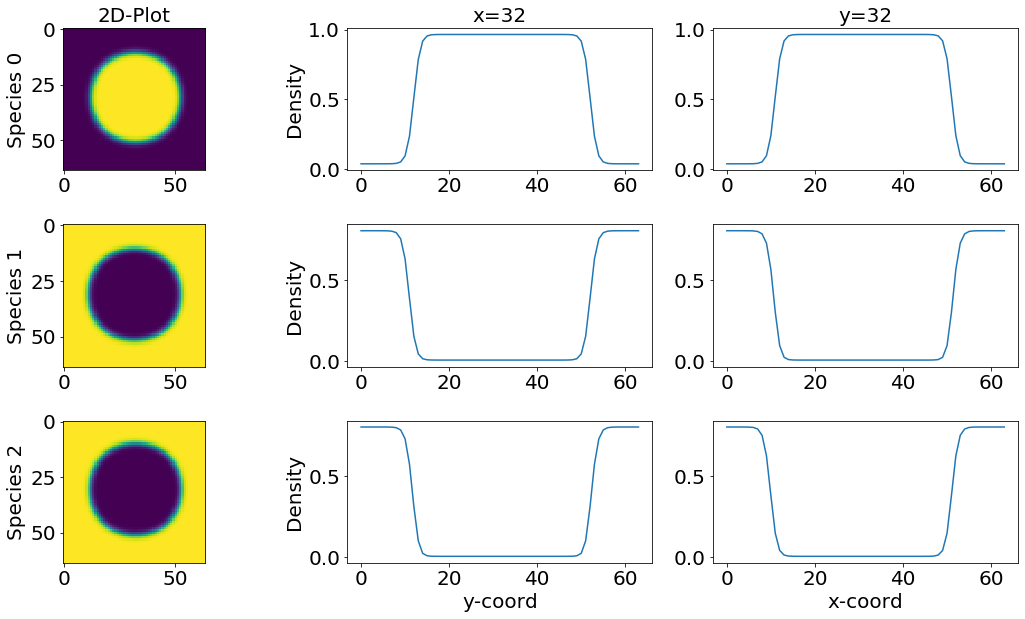

In [9]:
newModel = Model(model.size, epsi=model.epsi, dens_c=model.dens_c, r=model.r_hist[0])
print(newModel)
fig = model.print_2d_profile()

In [10]:
newModel.make_picard_iteration(0.02, 40000, 'dec2')

checkpoint at:         20, Error: 0.000533995992707041
checkpoint at:         40, Error: 7.237608472811907e-05
checkpoint at:         60, Error: 2.472605571657694e-05
checkpoint at:         80, Error: 1.0581338981309508e-05
checkpoint at:        100, Error: 5.333844827734379e-06
checkpoint at:        300, Error: 6.762006129140926e-07
checkpoint at:        500, Error: 1.3611811658881947e-06
checkpoint at:        700, Error: 3.546711338640045e-06
checkpoint at:        900, Error: 9.657910559588644e-06
checkpoint at:       1100, Error: 2.6927406042918518e-05
checkpoint at:       3100, Error:   0.6664691268494829
checkpoint at:       5100, Error: 0.022418963187405667
checkpoint at:       7100, Error: 8.330569162033025e-06
checkpoint at:       9100, Error: 3.493822087899935e-06
checkpoint at:      11100, Error: 1.4985150800787434e-06
checkpoint at:      31100, Error: 3.118069128396155e-10


Resultate aus aktueller Iteration: it_schritt: 40000
vapour dens         : 0.03764234492845923
liquid dens         : 0.966064900440629


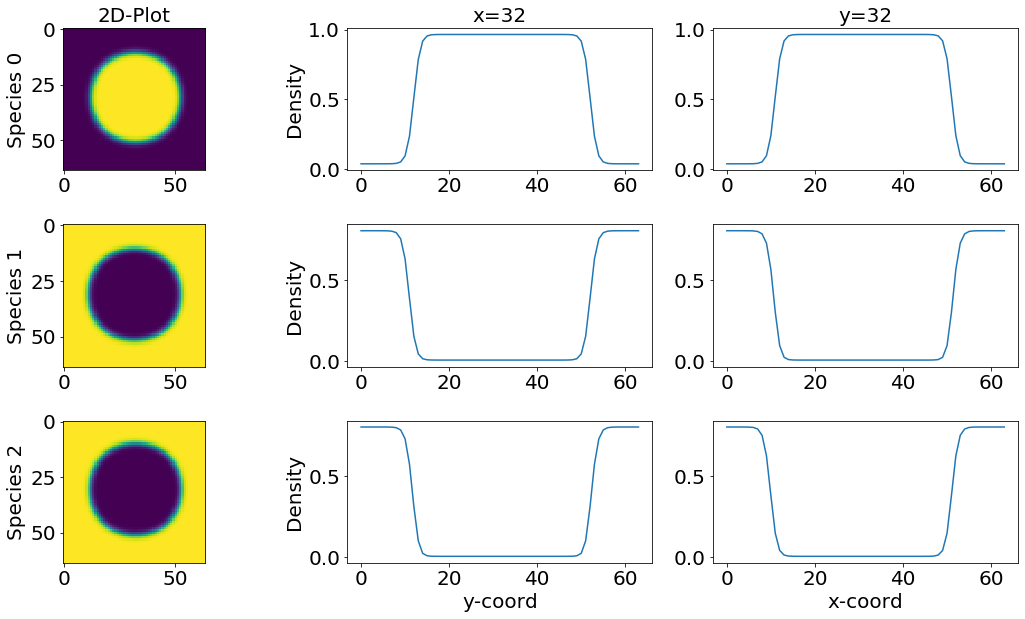

In [11]:
print('Resultate aus aktueller Iteration: it_schritt: '+str(newModel.it_hist[-1]))
model.print_2d_profile()
print('{0:<20}: {1}'.format('vapour dens', np.min(newModel.r_c)))
print('{0:<20}: {1}'.format('liquid dens', np.max(newModel.r_c)))

Resultate aus vergangener Profiel berechnung: it_schritt: 44643
vapour dens         : 0.03764234545852639
liquid dens         : 0.9660649008829867


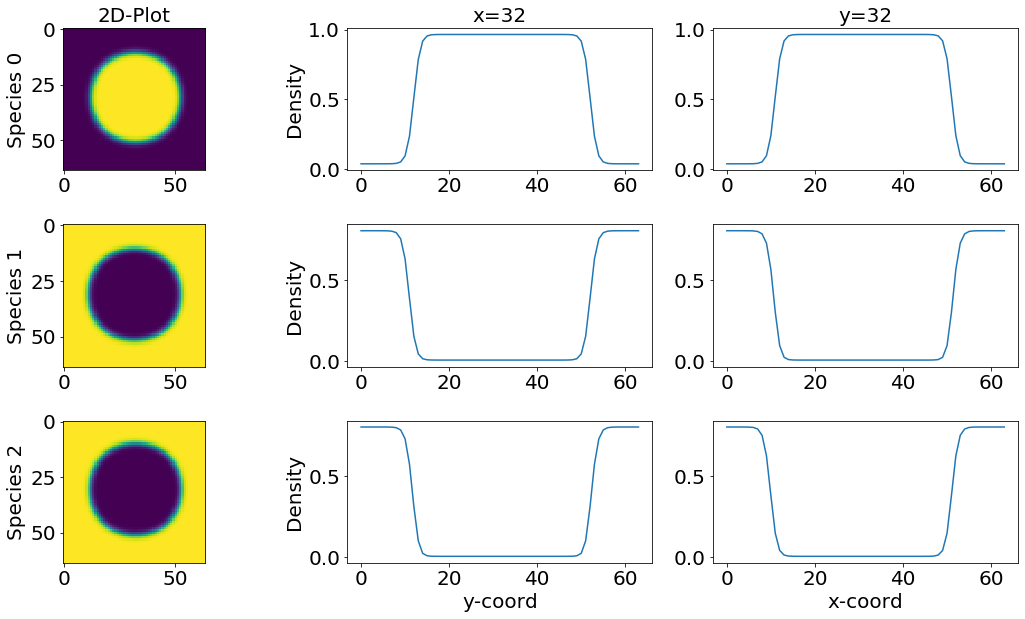

In [29]:
print('Resultate aus vergangener Profiel berechnung: it_schritt: '+str(model.it_hist[-1]))
model.print_2d_profile()
print('{0:<20}: {1}'.format('vapour dens', np.min(model.r_c)))
print('{0:<20}: {1}'.format('liquid dens', np.max(model.r_c)))

In [37]:
dif=model.r_c-newModel.r_c
print(np.max(dif))

1.3468435914265608e-05
